##GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer a woman job candidate, given what I would offer a man for the same job?)




In [1]:
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pylab as pl
import json
import os
s = json.load( open(os.getenv('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%matplotlib inline

/Users/luke/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

unfortunately a lot of the links that i originally used a few weeks ago are broken now. I posted the data I had used on the class webpage here (together with data for the buildings & energy homework): http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data

In [2]:
#to use the url just pas it to pandas read_excell
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
#split your data by male and female, for example you can load the data into 2 disctionary. other variables may be relevant: for example race.
#the names are not informative, and i am not giving you any meta data to find out what is in each file. 
# 08_2 files are male, 08_3 are female, and I am leaving in the lines of code that read the male files into races

allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

#allfemales['.....
#[...]

In [3]:
#REMOVE
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

##exploratory phase

In [4]:
#lest see what is in the data
from pandas.tools.plotting import scatter_matrix
#scatter_matrix(...

#like for the building homework: this fails cause the data is not parsed and formatted propoerly
#so maybe just print the columns to find out
#print allmales['all'].columns
print allmales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [5]:
#Another way to remove non real entries, is to use the np.isreal command, 
#i end up doing it in a for loop, which is ugly.
#think about how you could improve on that if you already have coding experience
#and are used to pythonic ways!

for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

    

/Users/luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


now you can try again with the scatter matrix and see if there are any insightful correlations. 
please  make and comment the plot


In [6]:
#do the same for females
#[...]
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)


/Users/luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


##to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males by race (one data point per race)

##also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay
(make the plot and describe it in a "caption" in the cell below the plot)

/Users/luke/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


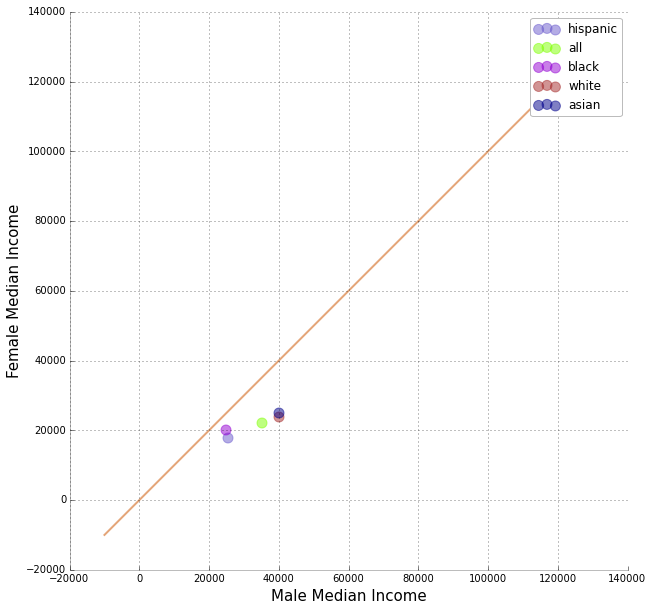

In [7]:
f = plt.figure(figsize=(10,10))
colors=['#6A5ACD','#7FFF00','#9400D3','#A52A2A','#00008B']
i=0 
ax1 = plt.subplot(1,1,1)
ax1.spines["top"].set_visible(False)  ## set the top frame invisible
ax1.spines["right"].set_visible(False) ## set the right frame invisible
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left()  
plt.xlabel('Male Median Income',fontsize=15)
plt.ylabel('Female Median Income',fontsize=15)
for keys in allmales:
    plt.scatter(allmales[keys]['Median income'][1],allfemales[keys]['Median income'][1],color=colors[i],s=100,label=keys,alpha=0.5)
    i += 1
x=np.linspace(-10000,120000,1000)
y=x
plt.plot(x, y, color='#D2691E',alpha=0.6)
plt.legend()

## Plot showed that female median income are lower than male in all races.

###Data Processing for OLS Regression

In [8]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
male_median=[]
female_median=[]
for keys in allmales:
    male_median.append(allmales[keys]['Median income'][1])
    female_median.append(allfemales[keys]['Median income'][1])
male_median=pd.DataFrame(male_median,columns=['male_median'])
female_median=pd.DataFrame(female_median,columns=['female_median'])
all_median= pd.merge(male_median,female_median,left_index=True,right_index=True)
all_median


,male_median,female_median
0,25411,17762
1,35228,22063
2,24855,20044
3,40122,23780
4,40153,24840


### OLS Regression fit

In [9]:
mod1 = smf.ols(formula='female_median ~ male_median', data = all_median).fit()
mod1.summary()

/Users/luke/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          female_median   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     22.70
Date:                Fri, 16 Oct 2015   Prob (F-statistic):             0.0176
Time:                        23:41:31   Log-Likelihood:                -40.948
No. Observations:                   5   AIC:                             85.90
Df Residuals:                       3   BIC:                             85.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    9989.8444   2508.397      3.983      0.028      2007.007   1.8e+04
male_median     0.3531      0.074      4.764      0.018         0.117     0.589
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.904
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.362
Skew:                           0.164   Prob(JB):                        0.835
Kurtosis:                       1.724   Cond. No.                     1.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS Regression Plot

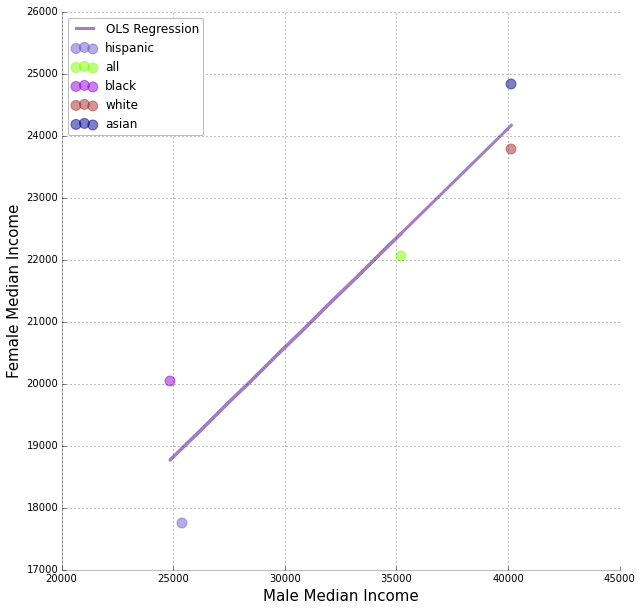

In [10]:
f = plt.figure(figsize=(10,10))
colors=['#6A5ACD','#7FFF00','#9400D3','#A52A2A','#00008B']
i=0 
ax1 = plt.subplot(1,1,1)
ax1.spines["top"].set_visible(False)  ## set the top frame invisible
ax1.spines["right"].set_visible(False) ## set the right frame invisible
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left()  
plt.xlabel('Male Median Income',fontsize=15)
plt.ylabel('Female Median Income',fontsize=15)
for keys in allmales:
    plt.scatter(allmales[keys]['Median income'][1],allfemales[keys]['Median income'][1],color=colors[i],s=100,label=keys,alpha=0.5)
    i += 1
plt.plot(all_median['male_median'], mod1.predict(),color='#4B0082',linewidth=3,alpha=0.5,label='OLS Regression')
plt.legend(loc='best')

##it turns out that there is an analytical solution for the OLS regression it is coded below. please try to read the code and understand the formula! 


In [11]:
#this is the analytical best regression line. it can be proved (ask me about it if you want!)

cor = stats.spearmanr(all_median.male_median, all_median.female_median)
all_median.male_median.std()/all_median.female_median.std()
beta1=cor[0]*all_median.female_median.std()/all_median.male_median.std()
beta0=all_median.female_median.mean()-beta1*all_median.male_median.mean()

##and plot the line corresponding to the analytical regression to compare it with the result of your numerical one

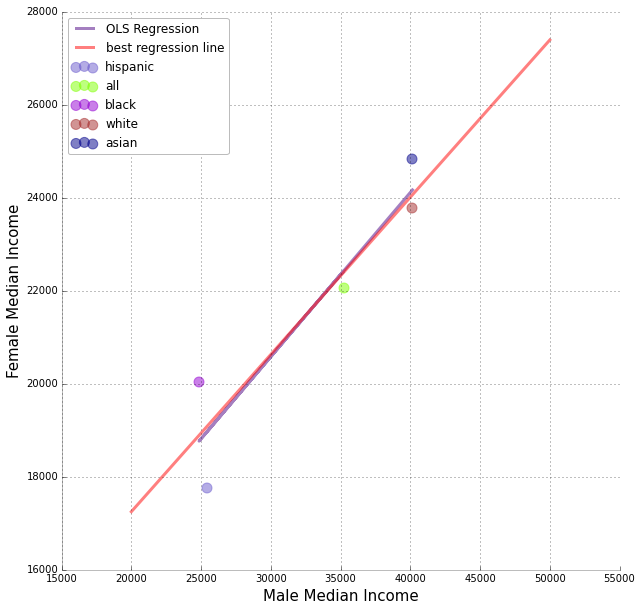

In [12]:
f = plt.figure(figsize=(10,10))
colors=['#6A5ACD','#7FFF00','#9400D3','#A52A2A','#00008B']
i=0 
x = np.arange(20000,50000,1)
y = beta0 + x * beta1
ax1 = plt.subplot(1,1,1)
ax1.spines["top"].set_visible(False)  ## set the top frame invisible
ax1.spines["right"].set_visible(False) ## set the right frame invisible
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left()  
plt.xlabel('Male Median Income',fontsize=15)
plt.ylabel('Female Median Income',fontsize=15)
for keys in allmales:
    plt.scatter(allmales[keys]['Median income'][1],allfemales[keys]['Median income'][1],color=colors[i],s=100,label=keys,alpha=0.5)
    i += 1
plt.plot(all_median['male_median'], mod1.predict(),color='#4B0082',linewidth=3,alpha=0.5,label='OLS Regression')
plt.plot(x,y,color='red',linewidth=3,alpha=0.5,label='best regression line')
plt.legend(loc='best')

#this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

if you use one data point for source of income (along the 'Median income' column) and fit a line and the line fit is similar then the median income was representative fo all forms of income for this analysis

to unravel the data and concatenate them back together in a single array is a little complex (there may be easier way, this is just wha i came up with. if you have something better please share!!)
here ar a few lines of code that should do the trick. i used nu.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. i also masked the nan values. i used the numpy ma (masled array) package. ever array is associated by this package to a mask array of Bools [True....False...] of the same size. the 

In [13]:
median_males = []
median_females = []
for keys in allmales:
    for i in range(len(allmales[keys]['Median income'])):
        median_males.append(allmales[keys]['Median income'][i])
        median_females.append(allfemales[keys]['Median income'][i])
median_males=pd.DataFrame(median_males,columns=['male_median'])
median_females=pd.DataFrame(median_females,columns=['female_median'])
all_median= pd.merge(median_males,median_females,left_index=True,right_index=True)
all_median=all_median.dropna()


In [14]:
mod2 = smf.ols(formula='female_median ~ male_median', data = all_median).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          female_median   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1075.
Date:                Fri, 16 Oct 2015   Prob (F-statistic):           7.21e-77
Time:                        23:41:32   Log-Likelihood:                -1668.8
No. Observations:                 178   AIC:                             3342.
Df Residuals:                     176   BIC:                             3348.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    1493.0394    351.359      4.249      0.000       799.619  2186.459
male_median     0.6090      0.019     32.787      0.000         0.572     0.646
==============================================================================
Omnibus:                       35.086   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.629
Skew:                          -0.011   Prob(JB):                     8.98e-81
Kurtosis:                      10.050   Cond. No.                     3.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
cor = stats.spearmanr(all_median.male_median, all_median.female_median)
all_median.male_median.std()/all_median.female_median.std()
beta1=cor[0]*all_median.female_median.std()/all_median.male_median.std()
beta0=all_median.female_median.mean()-beta1*all_median.male_median.mean()

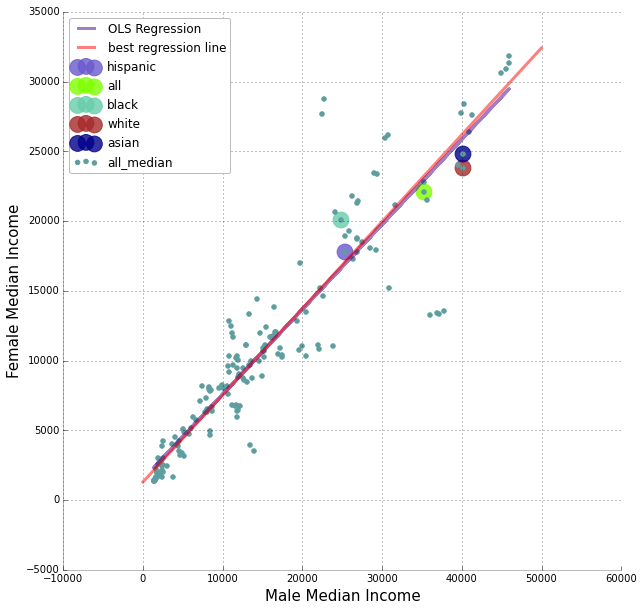

In [16]:
f1 = plt.figure(figsize=(10,10))
colors=['#6A5ACD','#7FFF00','#66CDAA','#A52A2A','#00008B']
i=0 
x = np.arange(0,50000,1)
y = beta0 + x * beta1
ax1 = plt.subplot(1,1,1)
ax1.spines["top"].set_visible(False)  ## set the top frame invisible
ax1.spines["right"].set_visible(False) ## set the right frame invisible
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left()  
plt.xlabel('Male Median Income',fontsize=15)
plt.ylabel('Female Median Income',fontsize=15)
for keys in allmales:
    plt.scatter(allmales[keys]['Median income'][1],allfemales[keys]['Median income'][1],color=colors[i],s=250,label=keys,alpha=0.8)
    i += 1
plt.scatter(all_median['male_median'],all_median['female_median'],color='#5F9EA0',label='all_median')
plt.plot(all_median['male_median'], mod2.predict(),color='#4B0082',linewidth=3,alpha=0.5,label='OLS Regression')
plt.plot(x,y,color='red',linewidth=3,alpha=0.5,label='best regression line')
plt.legend(loc='best')


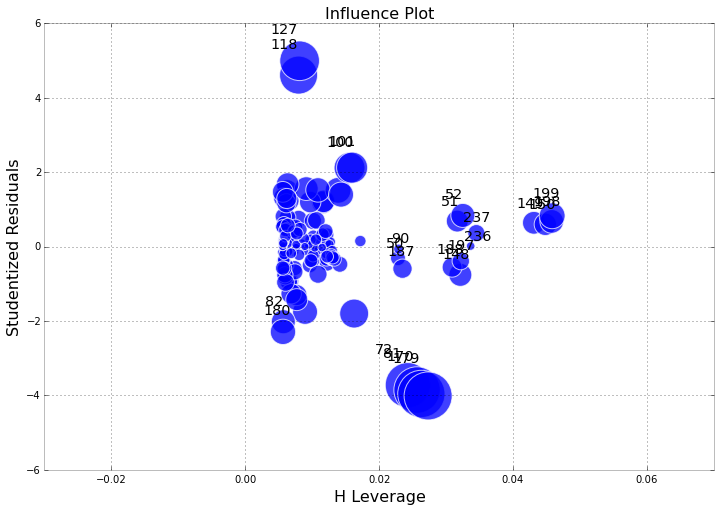

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(mod2,ax=ax,criterion="cooks")

##Comment:
- Yes, the line fit is similar
- High leverage values between 0.02 to 0.04 are high leverage points.

##Now pick a stipend, maybe your ideal stipend? 
##and predict what a woman in a position where a man recieves your ideal stipend would make



In [18]:
stipend = 5900
fstipend = stipend * mod2.params[1] + mod2.params[0] 
print fstipend

5086.26053049


##lastly do you have any comments about what these data tell us about race? how you would go about analyzing race differences with these data? (just a few sentences)

##Comment:
- Using Anova analysis to find wether there are race differences with those median income data.